## MINI PROJECT STUDY CASE ADULT CENSUS INCOME
### KELOMPOK 5
1. Marisca Amanda Hidayat
2. Zahrah Aliyah Rachman
3. Muh. Asrul
4. Cynthia Widya Lestari
5. Sakanti Dwi Bhanuwati

### IMPORT LIBRARIES

In [1]:
# import libraries
import pandas as pd
import numpy as np

# import visualization
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')


### DATA QUALITY ASSESSMENT

In [2]:
# load data from local files
df = pd.read_csv("data/adult.csv")

In [3]:
# show upper data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# show bottom data
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# check number of row and columns
df.shape

(32561, 15)

In [6]:
# show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Summary Data Frame
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values,
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(2)) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,age,int64,0,0.0,73,"[84, 25]"
1,workclass,object,0,0.0,9,"[Federal-gov, Self-emp-inc]"
2,fnlwgt,int64,0,0.0,21648,"[116820, 209609]"
3,education,object,0,0.0,16,"[Doctorate, 12th]"
4,education.num,int64,0,0.0,16,"[12, 2]"
5,marital.status,object,0,0.0,7,"[Married-spouse-absent, Married-AF-spouse]"
6,occupation,object,0,0.0,15,"[?, Transport-moving]"
7,relationship,object,0,0.0,6,"[Husband, Other-relative]"
8,race,object,0,0.0,5,"[Black, Amer-Indian-Eskimo]"
9,sex,object,0,0.0,2,"[Female, Male]"


In [8]:
# show missing
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
# show descriptive
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### DATA TYPE TRANSFORMATION

In [10]:
# copy dataset
df1 = df.copy()

In [11]:
# Repplace "?" with null
df1 = df1.replace('?', np.nan)

In [12]:
# Transformation of 'category' column
category_columns = ['workclass', 'education', 'marital.status', 'occupation',
                    'relationship', 'race', 'sex', 'native.country', 'income']
df1[category_columns] = df1[category_columns].astype('category')

In [13]:
# show info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      30718 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  31978 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [14]:
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### HANDLING MISSING VALUES

In [15]:
# check number of row and columns
df1.shape

(32561, 15)

In [16]:
# detect missing value precentage
missing_values = df1.isnull().sum()
total_values = df1.shape[0]

percentage_missing = round((missing_values / total_values) * 100, 2)

print(percentage_missing)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
income            0.00
dtype: float64


In [17]:
# show the descriptive stats (workclass)
df1['workclass'].describe()

,workclass
count,30725
unique,8
top,Private
freq,22696


In [18]:
# show the descriptive stats (native.country)
df1['native.country'].describe()

,native.country
count,31978
unique,41
top,United-States
freq,29170


In [19]:
# show the descriptive stats (occupation)
df1['occupation'].describe()

,occupation
count,30718
unique,14
top,Prof-specialty
freq,4140


In [20]:
# handling missing value with mode
df1['workclass'].fillna(df1['workclass'].mode()[0], inplace=True)
df1['occupation'].fillna(df1['occupation'].mode()[0], inplace=True)
df1['native.country'].fillna(df1['native.country'].mode()[0], inplace=True)

In [21]:
# show missing
df1.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


>This dataset has a condition without missing values, allowing the dataset to be processed directly with a more efficient approach and tends to produce more accurate analysis or models because the data used is more representative of the original population.

### DETECTING AND HANDLING OUTLIER

In [22]:
df1_num = df1.select_dtypes(include = ["int64"])

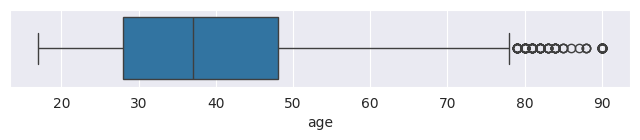

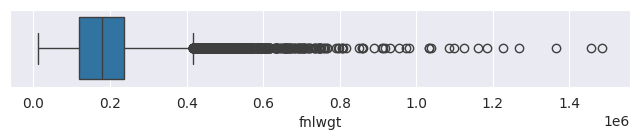

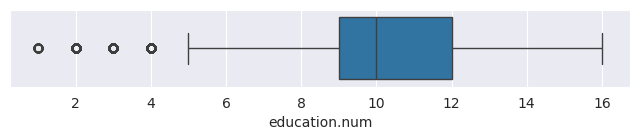

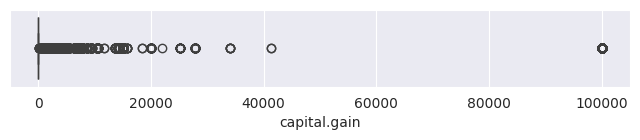

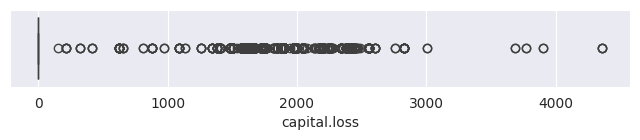

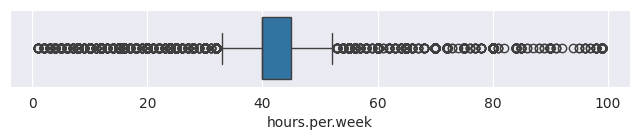

In [23]:
# detecting outlier using boxplot
for i in df1_num:
    plt.figure(figsize = (8,1))
    sns.boxplot(data = df1_num, x = i)
    plt.show()

In [24]:
# function to identify outliers using the IQR method
def find_outliers_iqr(column):
    if df1[column].dtype in ["int64"]:

        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
        return outliers
    else:
        return pd.DataFrame

In [25]:
# Identify columns with outtiers
columns_with_outliers = []
outliers_counts = {}

for column in df1.columns:
    outliers = find_outliers_iqr(column)
    if not outliers.empty:
        columns_with_outliers.append(column)
        outliers_counts[column] = len(outliers)

In [26]:
# Function to search for and remove outliers from DataFrame columns
def remove_outlier(df1, column):
    mean = df1[column].mean()
    std_dev = df1[column].std()

    z_scores = (df1[column] - mean) / std_dev
    threshold = 3  # Set the threshold for Z-score

    # Only stores data with Z-score <= threshold
    df1_cleaned = df1[(np.abs(z_scores) <= threshold)]

    return df1_cleaned

In [27]:
# List of columns to check for outliers
columns_to_check = ['age', 'fnlwgt', 'education.num', 'capital.gain',
                    'capital.loss', 'hours.per.week']

In [28]:
# Use functions to find and remove outliers from each column
for column in columns_to_check:
    df1 = remove_outlier(df1, column)

In [29]:
df1.shape

(29829, 15)

### DESCRIPTIVE ANALYSIS

In [30]:
df1.describe().round(0)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,29829.0,29829.0,29829.0,29829.0,29829.0,29829.0
mean,38.0,185203.0,10.0,570.0,1.0,40.0
std,13.0,94564.0,2.0,2332.0,33.0,11.0
min,17.0,12285.0,3.0,0.0,0.0,4.0
25%,27.0,117509.0,9.0,0.0,0.0,40.0
50%,37.0,177669.0,10.0,0.0,0.0,40.0
75%,47.0,234286.0,12.0,0.0,0.0,45.0
max,79.0,506436.0,16.0,22040.0,1258.0,77.0


In [31]:
df1.describe(include=['object','category','bool'])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,29829,29829,29829,29829,29829,29829,29829,29829,29829
unique,8,14,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22640,9807,13382,5330,11761,25474,19715,27354,23175


In [32]:
#Computing mean, and median to see the central tendency of each column
central_tend = pd.DataFrame({
    'Mean': df.select_dtypes (exclude=["object", "bool", "category"]).mean(),
    'Median': df.select_dtypes (exclude=["object", "bool", "category"]).median()
})

central_tend.round(0)

,Mean,Median
age,39.0,37.0
fnlwgt,189778.0,178356.0
education.num,10.0,10.0
capital.gain,1078.0,0.0
capital.loss,87.0,0.0
hours.per.week,40.0,40.0


In [33]:
#computing the range for each feature
df_num = df1.select_dtypes (exclude=["object", "bool", "category"])
for i in df_num:
    try:
        print(i, "range from: ", df1[i].min(), "to", df1[i].max(), ", ", f"{i} data spread: {df1[i].max(), df1[i].min()}")
    except:
        pass

age range from:  17 to 79 ,  age data spread: (79, 17)
fnlwgt range from:  12285 to 506436 ,  fnlwgt data spread: (506436, 12285)
education.num range from:  3 to 16 ,  education.num data spread: (16, 3)
capital.gain range from:  0 to 22040 ,  capital.gain data spread: (22040, 0)
capital.loss range from:  0 to 1258 ,  capital.loss data spread: (1258, 0)
hours.per.week range from:  4 to 77 ,  hours.per.week data spread: (77, 4)


In [34]:
# computing the variance for each feature
df1.select_dtypes(include=['int64','float64']).var()

,0
age,1.784195e+02
fnlwgt,8.942273e+09
education.num,6.016314e+00
capital.gain,5.440554e+06
capital.loss,1.070010e+03
hours.per.week,1.240842e+02


In [35]:
# computing the stand deviation for each feature
df1.select_dtypes(include=['int64','float64']).std()

,0
age,13.357377
fnlwgt,94563.592391
education.num,2.452818
capital.gain,2332.499433
capital.loss,32.711007
hours.per.week,11.139308


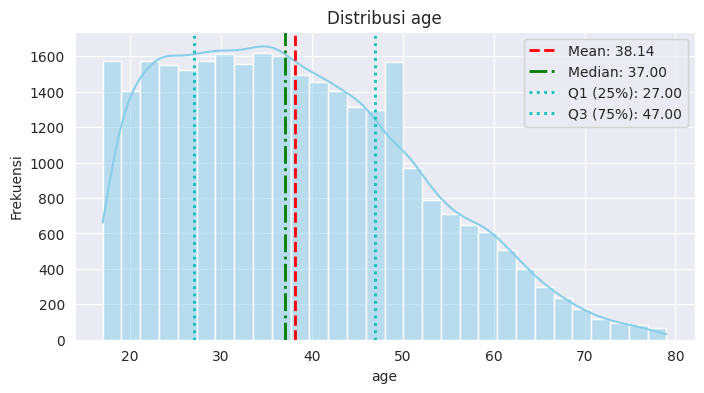

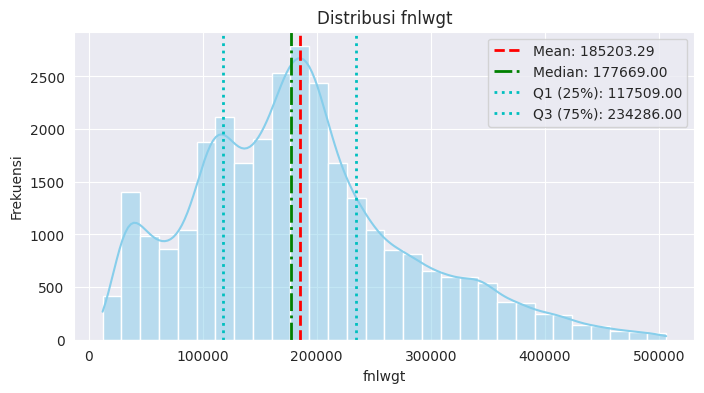

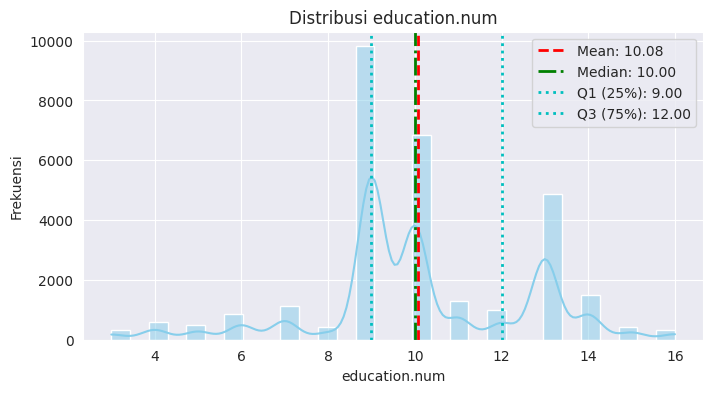

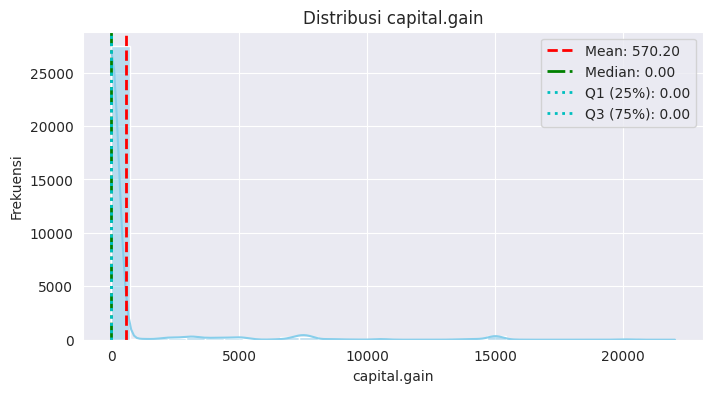

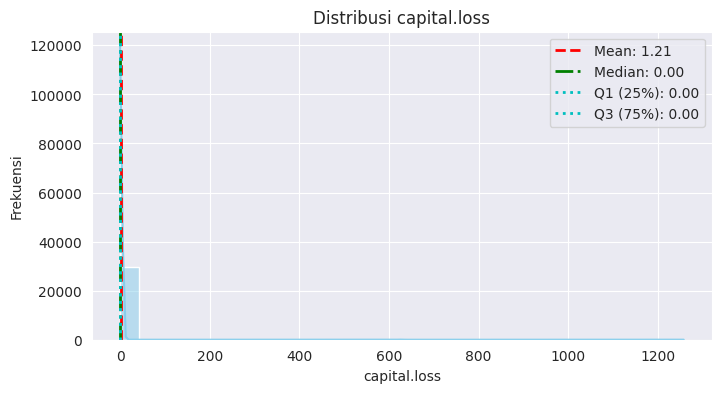

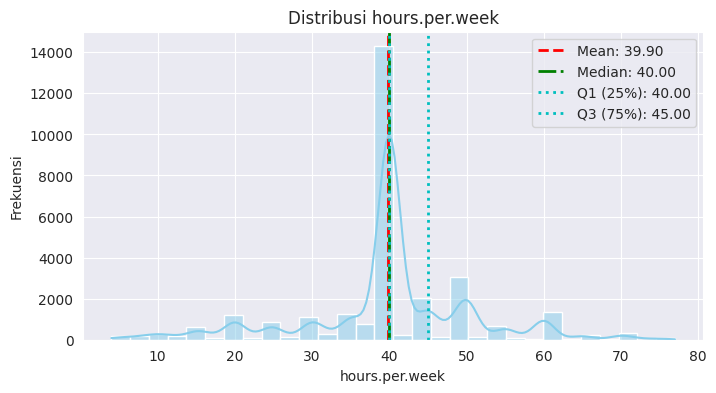

In [36]:
# select columns numeric
numerical_columns = df1.select_dtypes(include=['int64', 'float64'])

for col in numerical_columns:
    plt.figure(figsize=(8, 4))

    # Plot distribusi
    sns.histplot(numerical_columns[col], kde=True, bins=30, color='skyblue')

    # Plot garis vertikal untuk mean, median, quantile, dan standar deviasi
    mean = numerical_columns[col].mean()
    median = numerical_columns[col].median()
    quantile_25 = numerical_columns[col].quantile(0.25)
    quantile_75 = numerical_columns[col].quantile(0.75)
    std_dev = numerical_columns[col].std()

    plt.axvline(mean, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='-.', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(quantile_25, color='c', linestyle=':', linewidth=2, label=f'Q1 (25%): {quantile_25:.2f}')
    plt.axvline(quantile_75, color='c', linestyle=':', linewidth=2, label=f'Q3 (75%): {quantile_75:.2f}')

    # legend
    plt.legend()

    # judul dan label
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

In [37]:
# Calculate skew and sort
skew_feats = numerical_columns.skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
capital.loss,29.662239
capital.gain,4.943641
fnlwgt,0.634818
age,0.491169
education.num,-0.170352
hours.per.week,-0.354184


Text(0.5, 1.0, 'Adult Census Correlation Matrix')

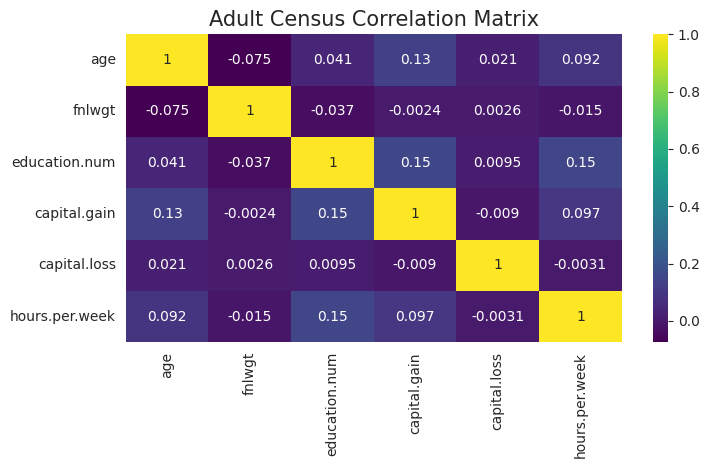

In [38]:
corr_matrix = numerical_columns.corr()
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(data=corr_matrix, annot=True, cmap='viridis')
ax.set_title('Adult Census Correlation Matrix', fontsize=15)

### DATA VISUALIZATION

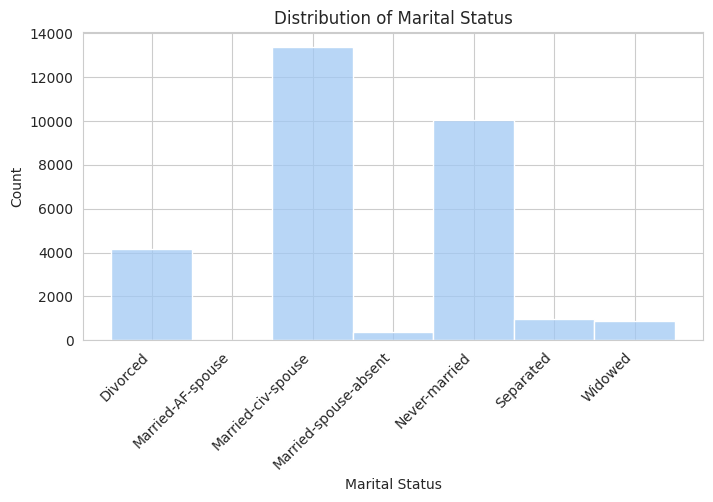

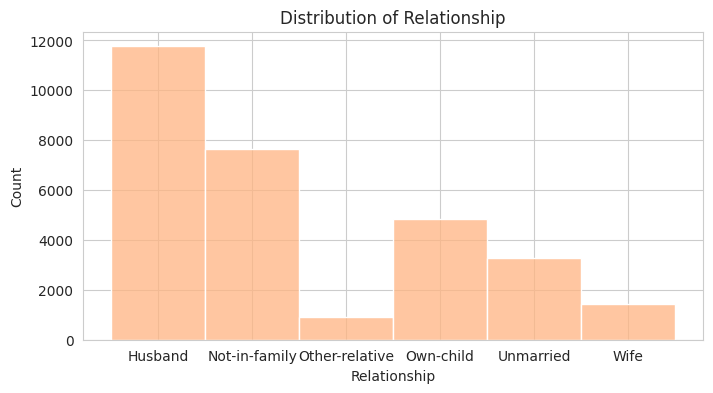

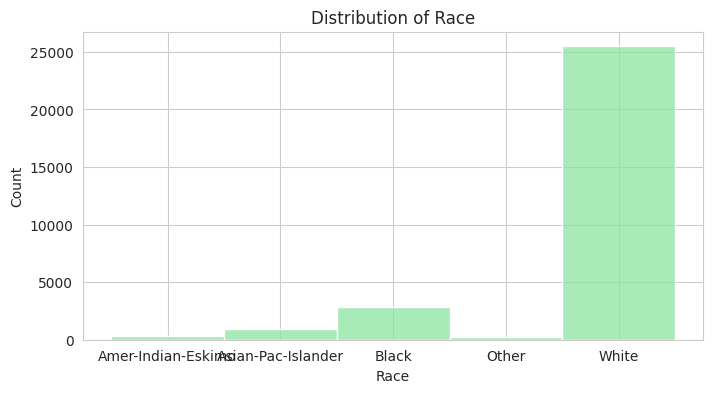

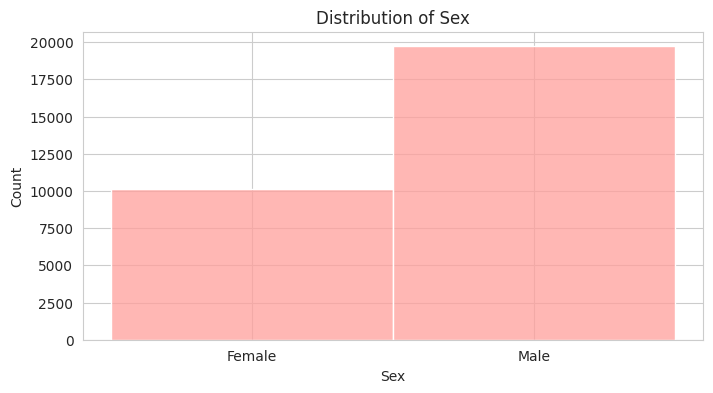

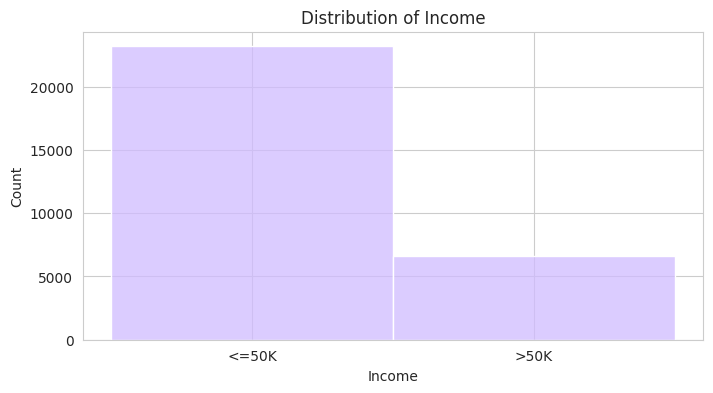

In [39]:
# Check Pattern
# Set style
sns.set_style('whitegrid')
colors = sns.color_palette("pastel")

# Check pattern of marital.status
plt.figure(figsize=(8, 4))
sns.histplot(df1['marital.status'], color=colors[0], bins=10)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

# Check pattern of relationship
plt.figure(figsize=(8, 4))
sns.histplot(df1['relationship'], color=colors[1], bins=10)
plt.title('Distribution of Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.show()

# Check pattern of race
plt.figure(figsize=(8, 4))
sns.histplot(df1['race'], color=colors[2], bins=10)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Check pattern of sex
plt.figure(figsize=(8, 4))
sns.histplot(df1['sex'], color=colors[3], bins=10)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Check pattern of income
plt.figure(figsize=(8, 4))
sns.histplot(df1['income'], color=colors[4], bins=10)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

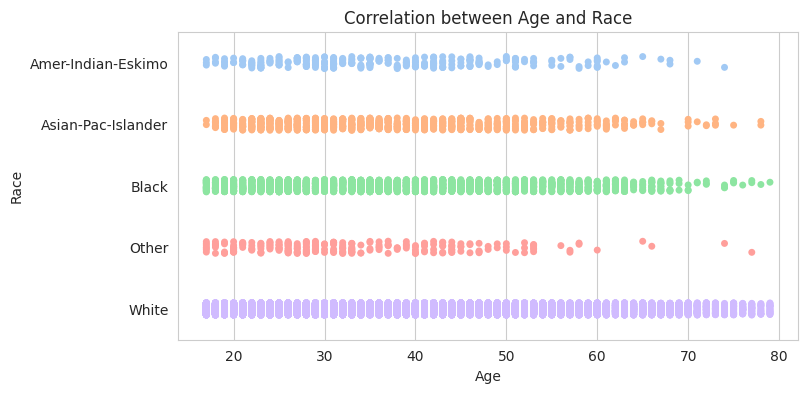

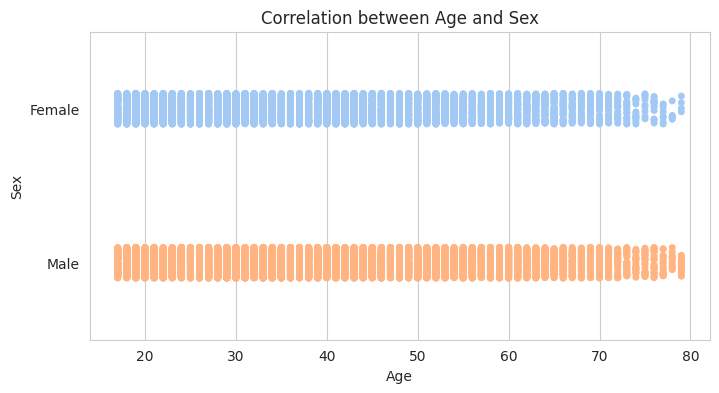

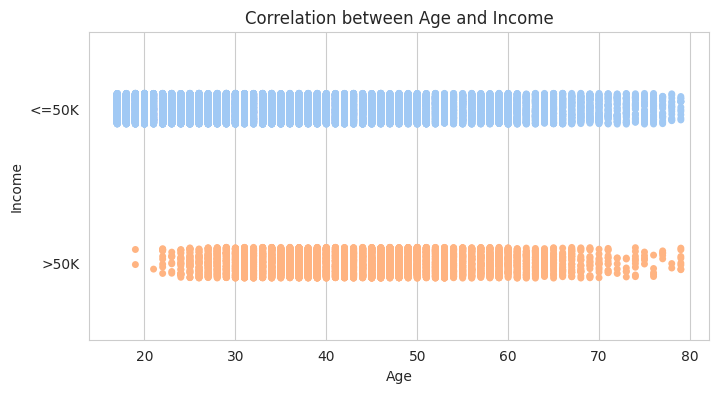

In [40]:
# Correlation
# Set style
sns.set_style('whitegrid')
colors = sns.color_palette("pastel")

# Check correlation between 'age' and 'race' using stripplot
plt.figure(figsize=(8, 4))
sns.stripplot(x='age', y='race', data=df1, palette=colors)
plt.title('Correlation between Age and Race')
plt.xlabel('Age')
plt.ylabel('Race')
plt.show()

# Check correlation between 'age' and 'sex' using stripplot
plt.figure(figsize=(8, 4))
sns.stripplot(x='age', y='sex', data=df1, palette=colors)
plt.title('Correlation between Age and Sex')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

# Check correlation between 'age' and 'income' using stripplot
plt.figure(figsize=(8, 4))
sns.stripplot(x='age', y='income', data=df1, palette=colors)
plt.title('Correlation between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

### SUMMARY

In [41]:
# load data from local files
df2 = pd.read_csv("data/adult.csv")

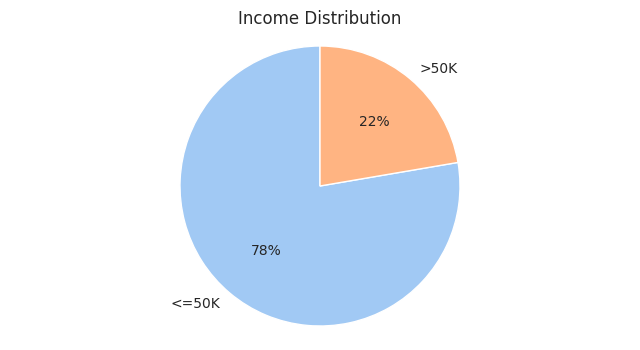

In [42]:
# Create the pie chart to show the income distribution
plt.figure(figsize=(8, 4))
plt.title("Income Distribution")
plt.pie( df1['income'].value_counts(normalize=True) * 100,
        labels=df2['income'].value_counts().index,  # Corrected here
        autopct='%1.0f%%',
        startangle=90,
        colors=sns.color_palette("pastel"),
        wedgeprops=dict(edgecolor='white'))
plt.axis('equal')

plt.show()

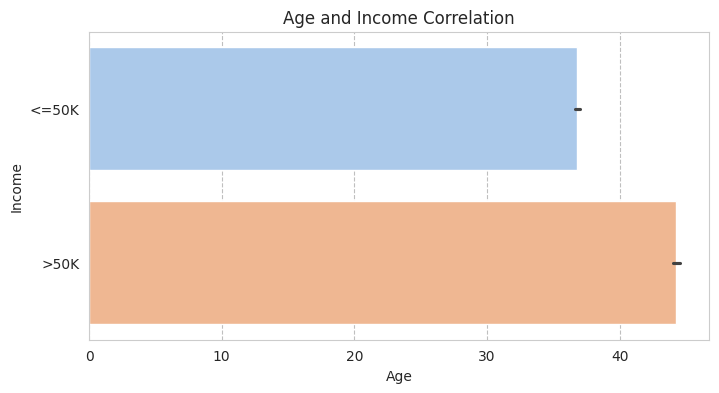

In [43]:
# Create a bar plot to show the distribution of age for each income group
plt.figure(figsize=(8, 4))
sns.barplot(data=df2, y='income', x='age', palette="pastel")
plt.title("Age and Income Correlation")
plt.ylabel("Income")
plt.xlabel("Age")
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
plt.gca().set_facecolor('white')

plt.show()

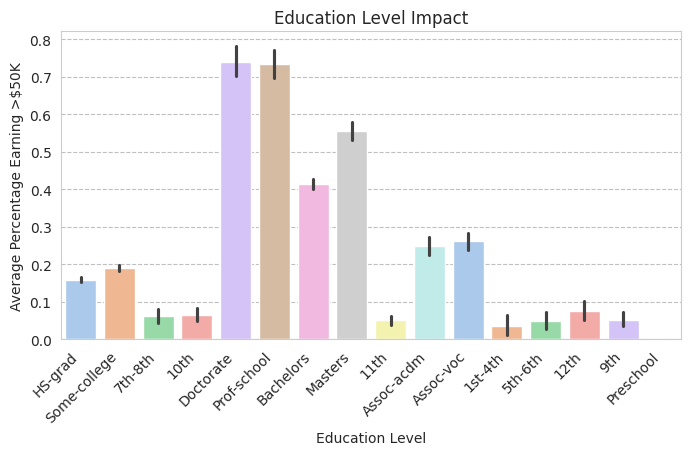

In [44]:
# Create a bar plot for the education level impact on earning >$50K
plt.figure(figsize=(8, 4))
sns.barplot(data=df2, x='education',
            y=df2['income'].apply(lambda x: 1 if x == ">50K" else 0),
            estimator=np.mean, palette="pastel")
plt.title("Education Level Impact")
plt.xlabel("Education Level")
plt.ylabel("Average Percentage Earning >$50K")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
plt.gca().set_facecolor('white')

plt.show()

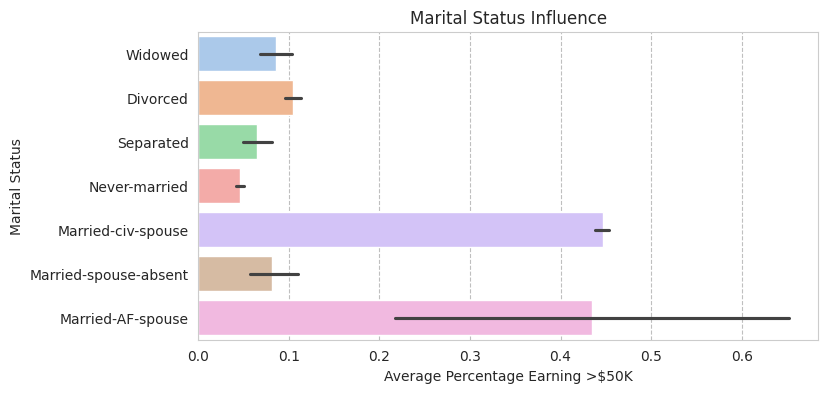

In [45]:
# Create a bar plot to show  marital status plays a crucial role in income levels
plt.figure(figsize=(8, 4))
sns.barplot(data=df2, y='marital.status',
            x=df2['income'].apply(lambda x: 1 if x == ">50K" else 0),
            estimator=np.mean, palette="pastel")
plt.title("Marital Status Influence")
plt.ylabel("Marital Status")
plt.xlabel("Average Percentage Earning >$50K")
plt.xticks(fontsize=10)
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.5)
plt.gca().set_facecolor('white')

plt.show()

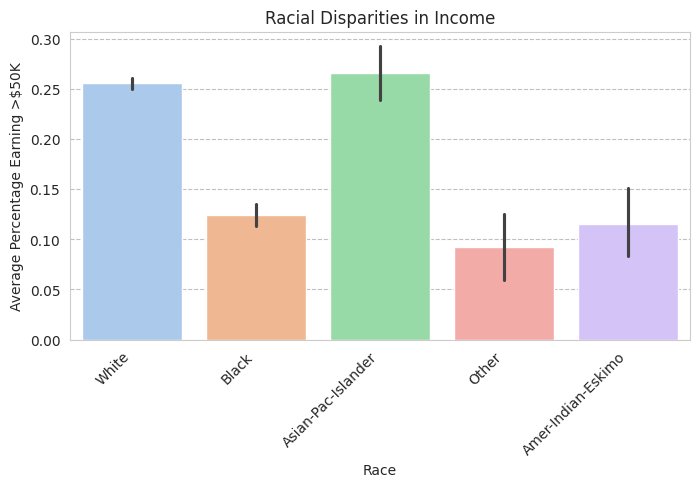

In [46]:
# Create a bar plot to show the proportion of high earners across different races
plt.figure(figsize=(8, 4))
sns.barplot(data=df2, x='race',
            y=df2['income'].apply(lambda x: 1 if x == ">50K" else 0),
            estimator=np.mean, palette="pastel")
plt.title("Racial Disparities in Income")
plt.xlabel("Race")
plt.ylabel("Average Percentage Earning >$50K")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
plt.gca().set_facecolor('white')

plt.show()

### EXPORT DATA

In [47]:
# Export the cleaned data to a new CSV file
df1.to_csv('data/adult_cleaned.csv', index=False)
print("Data has been successfully saved")

Data has been successfully saved
